Importing plotly failed. Interactive plots will not work.
/Users/matthias.wagner/ecommerce/smartstore/forecaster/notebooks/sales_visualization.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df_copy[sales_column].resample('M').sum()


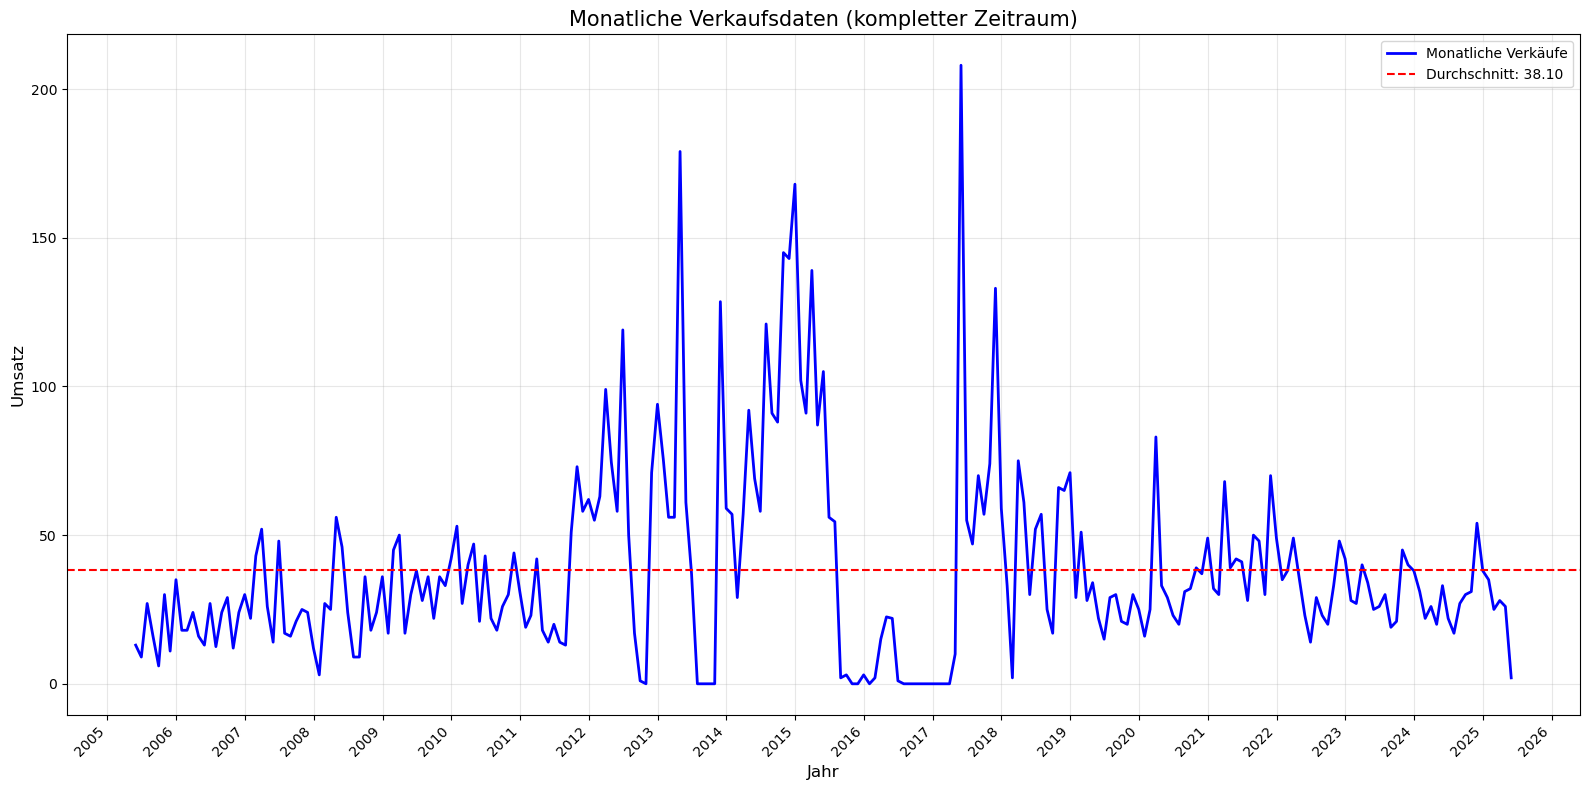

Zeitraum: 2005-05 bis 2025-05
Anzahl der Monate: 241
Durchschnittlicher Umsatz: 38.10
Min: 0.00, Max: 208.00


/Users/matthias.wagner/ecommerce/smartstore/forecaster/notebooks/sales_visualization.py:116: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = dataframe[sales_column].resample('M').sum()


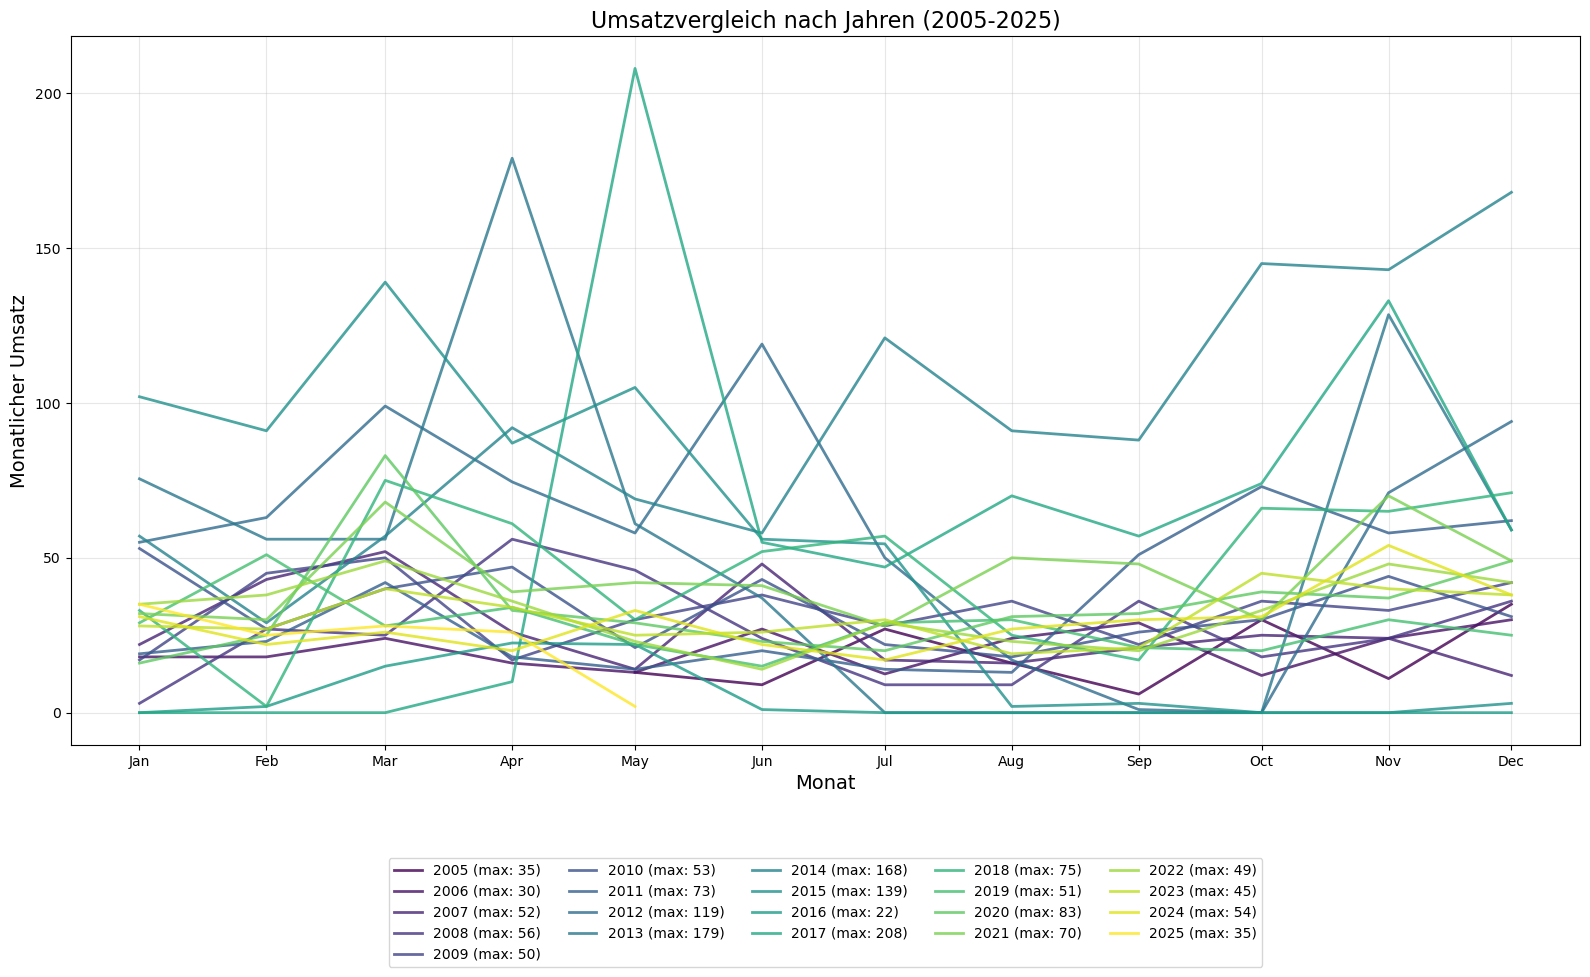

Jahre mit verfügbaren Daten: 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025

Umsatzstatistik pro Jahr:
2005: Durchschnitt: 18.38, Min: 6.00, Max: 35.00
2006: Durchschnitt: 20.62, Min: 12.00, Max: 30.00
2007: Durchschnitt: 26.67, Min: 12.00, Max: 52.00
2008: Durchschnitt: 26.08, Min: 3.00, Max: 56.00
2009: Durchschnitt: 32.83, Min: 17.00, Max: 50.00
2010: Durchschnitt: 33.50, Min: 18.00, Max: 53.00
2011: Durchschnitt: 33.92, Min: 13.00, Max: 73.00
2012: Durchschnitt: 58.46, Min: 0.00, Max: 119.00
2013: Durchschnitt: 54.33, Min: 0.00, Max: 179.00
2014: Durchschnitt: 93.17, Min: 29.00, Max: 168.00
2015: Durchschnitt: 53.54, Min: 0.00, Max: 139.00
2016: Durchschnitt: 5.21, Min: 0.00, Max: 22.50
2017: Durchschnitt: 59.42, Min: 0.00, Max: 208.00
2018: Durchschnitt: 46.17, Min: 2.00, Max: 75.00
2019: Durchschnitt: 27.83, Min: 15.00, Max: 51.00
2020: Durchschnitt: 34.75, Min: 16.00, Max: 83.00
2021: Durchschnitt: 43.

/Users/matthias.wagner/ecommerce/smartstore/forecaster/notebooks/sales_visualization.py:380: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df_copy[sales_column].resample('M').sum()


Durchschnittlicher Monatsumsatz (2005-2025):
January: 33.02
February: 32.20
March: 49.80
April: 46.40
May: 41.90
June: 36.40
July: 30.60
August: 25.85
September: 26.45
October: 35.35
November: 51.88
December: 47.15

Höchster Monatsdurchschnitt: November (51.88)
Niedrigster Monatsdurchschnitt: August (25.85)
Gesamtdurchschnitt über alle Monate: 38.08


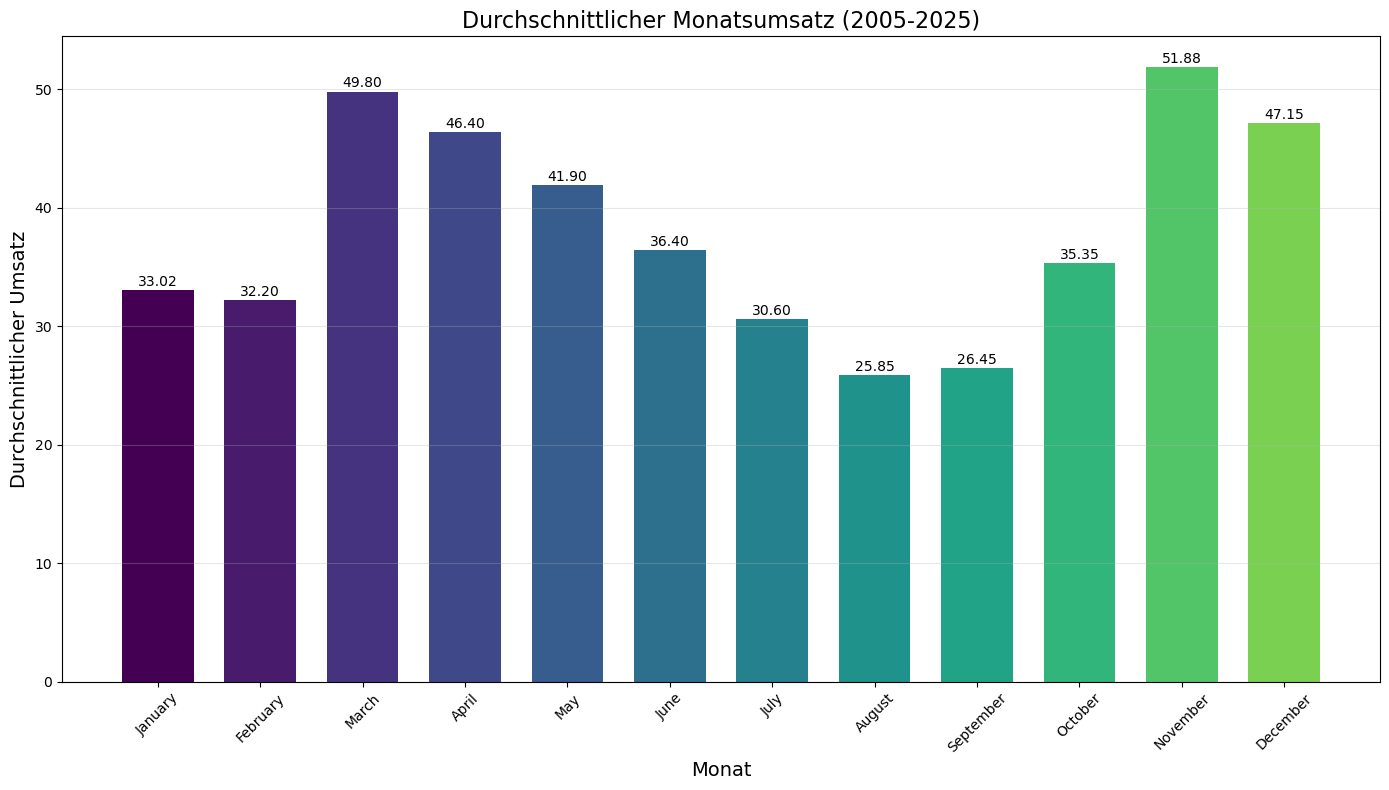

TypeError: Invalid comparison between dtype=int64 and str

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose

from sales_visualization import (
    plot_monthly_totals_across_years,
    plot_whole_timespan,
    plot_yearly_sales_comparison,
    plot_monthly_average_across_years,
)

plt.rcdefaults()

# Setze explizit auf weißen Hintergrund
plt.style.use('default')
sns.set_style("white")  # oder "whitegrid"

# Weiß als explizite Farbe für alle Ebenen setzen
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'ytick.direction': 'out',
    'xtick.direction': 'out',
})


CSV_PATH = '../data/ananas.csv'
DATE_COLUMN_NAME = 'Datum'
SALES_COLUMN_NAME = 'Sales'
COLUMN_SEPARATOR = ';'
DECIMAL_SEPARATOR = ','
ENCODING_LATIN = 'latin-1'

# plt.style.use('seaborn-v0_8-white')      # Weißer Hintergrund
# plt.style.use('seaborn-v0_8-whitegrid')
plt.style.use('default')
sns.set_palette('deep')
plt.rcdefaults()  # Reset alle Einstellungen
plt.style.use('default')
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.facecolor': 'white',
    'text.color': 'black',
    'axes.labelcolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black'
})

df = pd.read_csv(CSV_PATH,
                 encoding=ENCODING_LATIN,
                 sep=COLUMN_SEPARATOR,
                 decimal=DECIMAL_SEPARATOR,
                 usecols=[DATE_COLUMN_NAME, SALES_COLUMN_NAME])

df.columns = df.columns.str.strip()
columns = df.columns.tolist()
date_column = columns[0]
sales_column = columns[1]

df[date_column] = pd.to_datetime(df[date_column], format='%d.%m.%Y')

df.set_index(date_column, inplace=True)

all_monthly_data = plot_whole_timespan(df, date_column, sales_column)

plot_yearly_sales_comparison(df, date_column, sales_column, start_year=2005, end_year=2025)


monthly_totals = plot_monthly_average_across_years(df,
                                  sales_column,
                                  start_year=2005,
                                   end_year=2025)

from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Zeitreihe auf April 2025 begrenzen
monthly_sales_cut = all_monthly_data[all_monthly_data.index <= '2025-04-30']

# Modell trainieren
model = ExponentialSmoothing(
    monthly_sales_cut,
    trend='add',
    seasonal='add',
    seasonal_periods=12
)
model_fit = model.fit()

# Prognose für 12 Monate
forecast = model_fit.forecast(12)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales_cut, label='Vergangene Verkäufe (bis April 2025)')
plt.plot(forecast, label='Prognose (12 Monate)', linestyle='--')
plt.title('Holt-Winters Prognose (bereinigt)')
plt.xlabel('Datum')
plt.ylabel('Verkäufe')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

